# Task 3 - Prediction using Unsupervised ML

<p> The given task is to predict the optimum number of clusters from the given 'Iris' dataset and represent it visually. </p>

### Prepared by: Nithiyashree M G

## Importing Necessary Libraries

<p> The libraries <i>numpy</i> and <i>pandas</i> are used for data analysis, <i>matplotlib</i> and <i>seaborn</i> for data visualization, and <i>scikit-learn</i> for clustering the data. </p>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn import datasets

## Importing the Dataset

<p> In this task, we are given with a dataset <i>Iris.csv</i>, containing information about different iris flowers. </p>

In [2]:
raw_csv_data = pd.read_csv('Iris.csv')
raw_csv_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Getting info about the Dataset

In [3]:
raw_csv_data.shape

(150, 6)

#### The dataset totally contains 150 entries, with 6 attributes.

In [4]:
raw_csv_data.describe(include = 'all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [5]:
raw_csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Since Id is an extra column, dropping it from the dataset

In [6]:
df = raw_csv_data.drop('Id', axis = 1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Count of each Species: Univariate Analysis

In [7]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
list(df['Species'].unique())

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

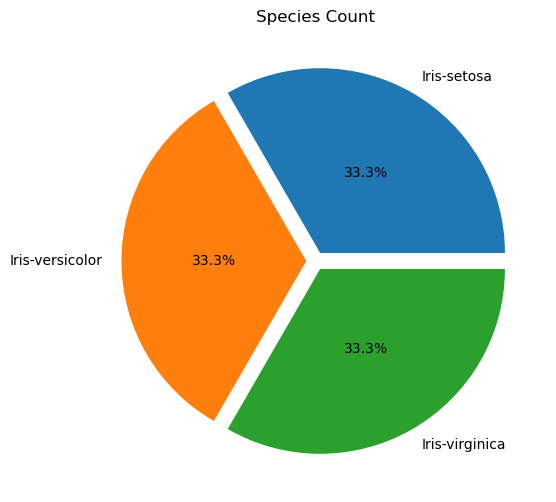

In [9]:
labels = list(df['Species'].unique())
plt.style.use('default')
plt.figure(figsize = (10, 6))
plt.pie(x = df['Species'].value_counts(), labels = labels, autopct = '%1.1f%%', explode = [0.05]*3, pctdistance = 0.5)
plt.title('Species Count', fontsize = 12)
plt.show()

## Bivariate Analysis

### Sepal Width of each Species

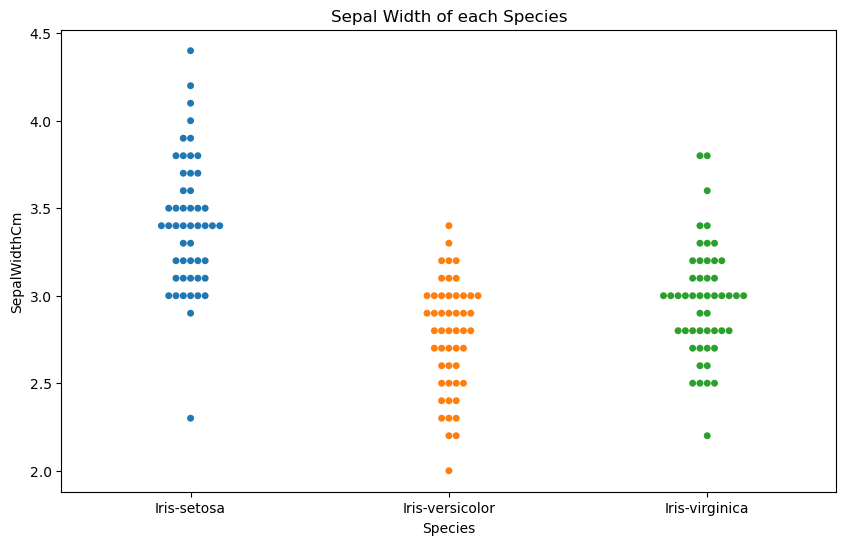

In [10]:
plt.figure(figsize = (10, 6))
plt.style.use('default')
sns.swarmplot(data = df, x = "Species", y = "SepalWidthCm")
plt.title('Sepal Width of each Species')
plt.show()

### Sepal Length of each Species

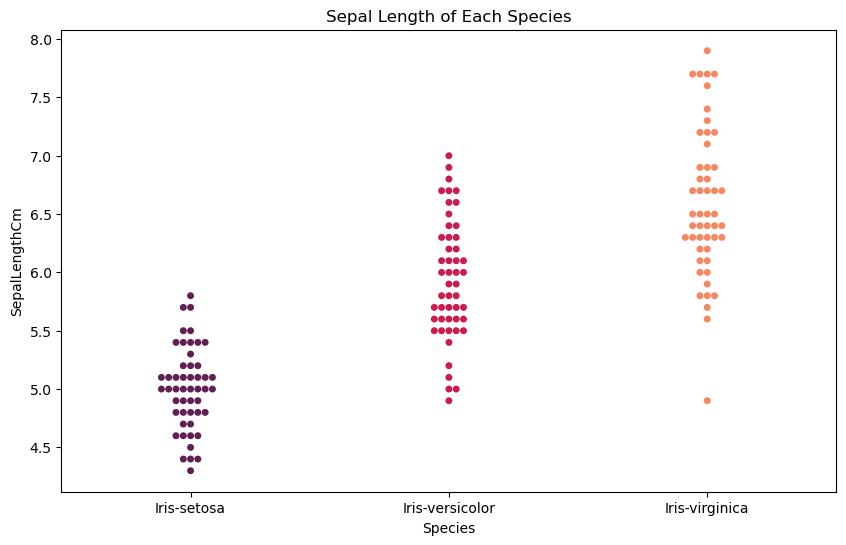

In [11]:
plt.style.use('default')
plt.figure(figsize = (10, 6))
sns.swarmplot(data = df, x = 'Species', y = 'SepalLengthCm', palette = 'rocket')
plt.title('Sepal Length of Each Species')
plt.show()

### Petal Width of Each Species

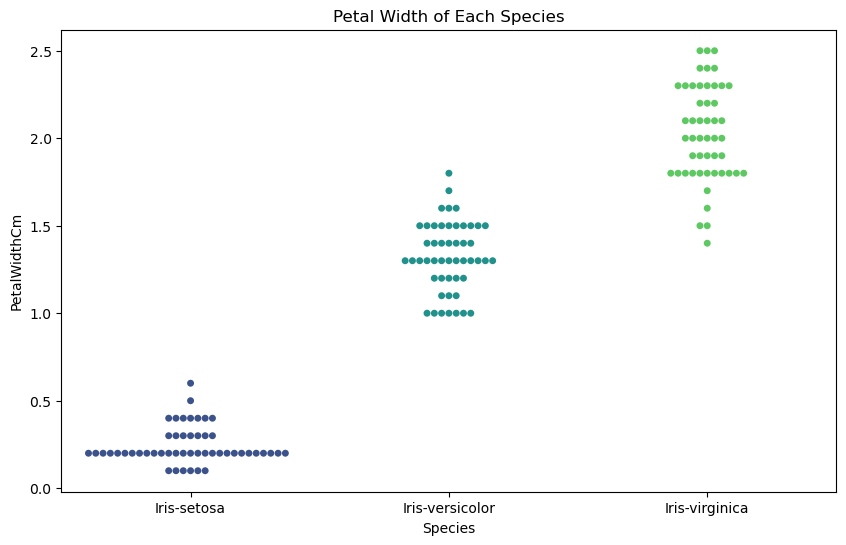

In [12]:
plt.style.use('default')
plt.figure(figsize = (10, 6))
sns.swarmplot(data = df, x = 'Species', y = 'PetalWidthCm', palette = 'viridis')
plt.title('Petal Width of Each Species')
plt.show()

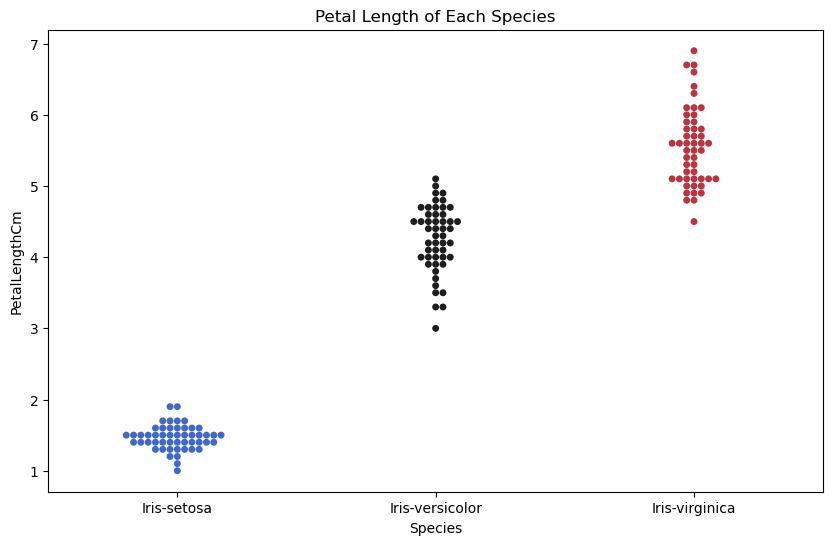

In [13]:
plt.style.use('default')
plt.figure(figsize = (10, 6))
sns.swarmplot(data = df, x = 'Species', y = 'PetalLengthCm', palette = 'icefire')
plt.title('Petal Length of Each Species')
plt.show()

## Multivariate Analysis

### Petal Length & Width of each Species

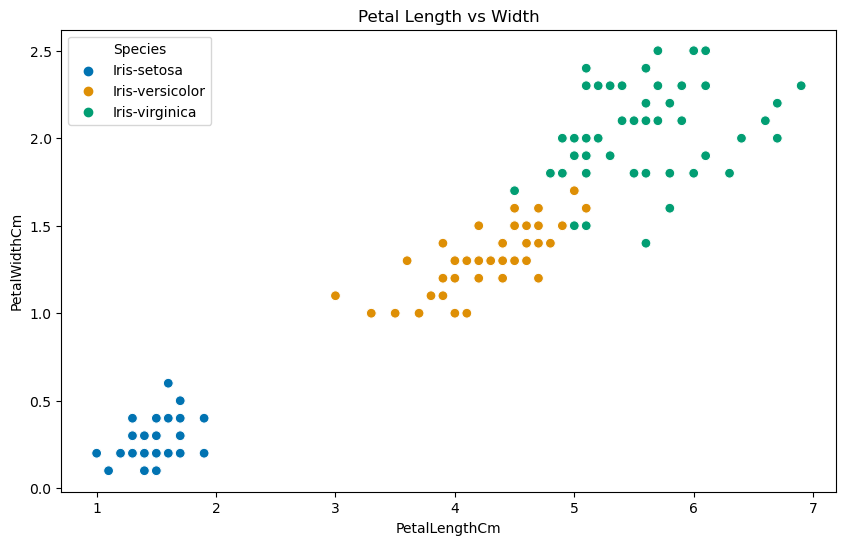

In [14]:
plt.style.use('default')
plt.figure(figsize = (10, 6))
sns.scatterplot(x = df['PetalLengthCm'], y = df['PetalWidthCm'], hue = df['Species'], palette = 'colorblind', s = 50)
plt.title('Petal Length vs Width')
plt.show()

### Sepal Length & Width of each Species

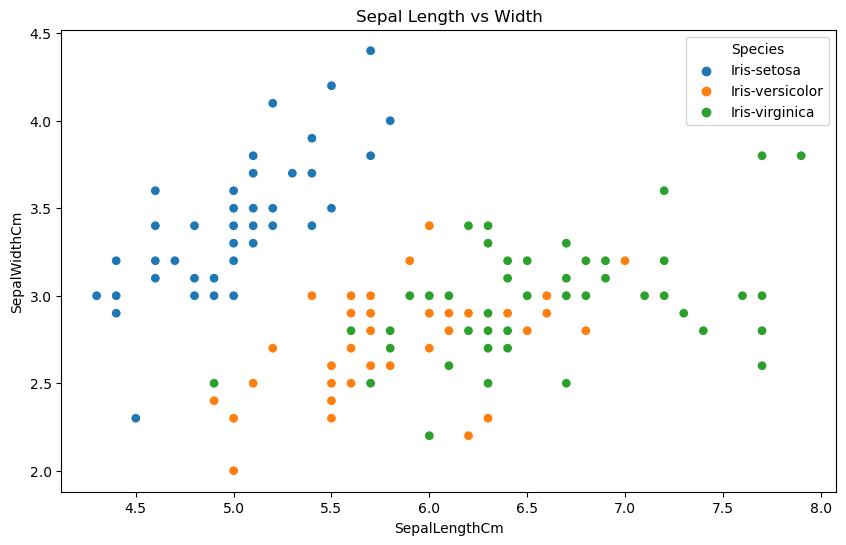

In [15]:
plt.style.use('default')
plt.figure(figsize = (10, 6))
sns.scatterplot(x = df['SepalLengthCm'], y = df['SepalWidthCm'], hue = df['Species'], s = 50)
plt.title('Sepal Length vs Width')
plt.show()

## K-Means Clustering

<p> Here we are using K-Means Clustering to segregate the iris dataset into optimal no. of clusters. The value of <b>K</b> will determine the optimum number of clusters. </p>
<p> The value of K can be determined using the <i>Elbow method</i>, where the Within Cluster Sum of Squares (WCSS) value will change from significant decrease to a constant value. </p>

In [16]:
from sklearn.cluster import KMeans

In [17]:
x = df.iloc[:, :4].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
wcss_values = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
    kmeans.fit(x)
    wcss_values.append(kmeans.inertia_)

### Elbow Graph

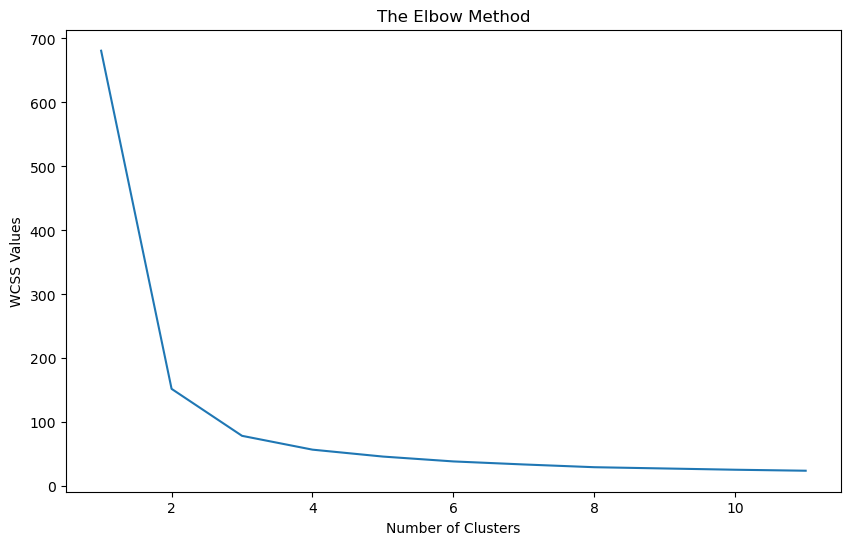

In [19]:
plt.style.use('default')
plt.figure(figsize = (10, 6))
plt.plot(range(1, 12), wcss_values)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Values') # Within cluster sum of squares
plt.show()

#### From the Elbow graph, let us consider K value as 3.

### Creating K-Means Classifier

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

## Visualizing the Clusters

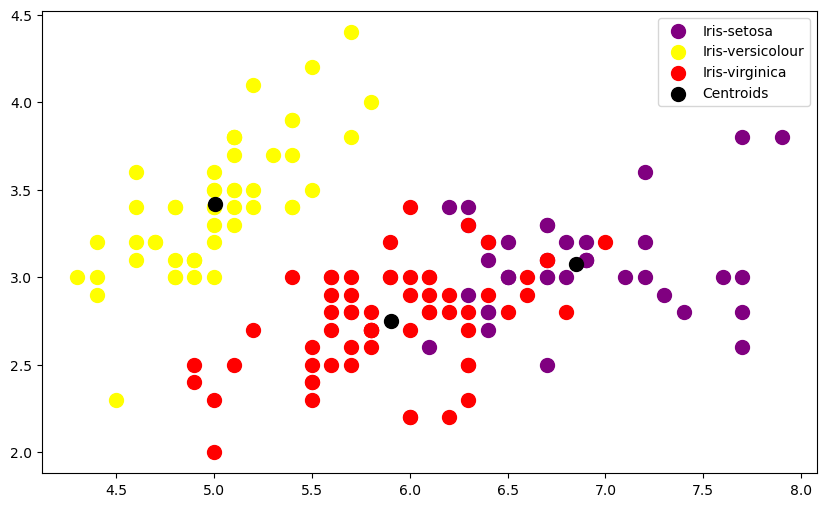

In [21]:
plt.style.use('default')
plt.figure(figsize = (10, 6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()
plt.show()